In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

data = pd.read_csv('sorted_nodbot_annotations_revised.csv')

In [4]:

annotation_list = [
     "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
     "slower", "demanding tone", "interrogative tone", "filler words", "humor",
     "amusement", "confusion", "frustration",
     "quitting"
]

categories = {
    "verbal response": ["repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt"],
    "verbal tone or cadence": ["slower", "demanding tone", "interrogative tone", "filler words"],
    "emotion": ["amusement", "confusion", "frustration", "humor"],
    "quitting": ["quitting"]
}


Plot saved.


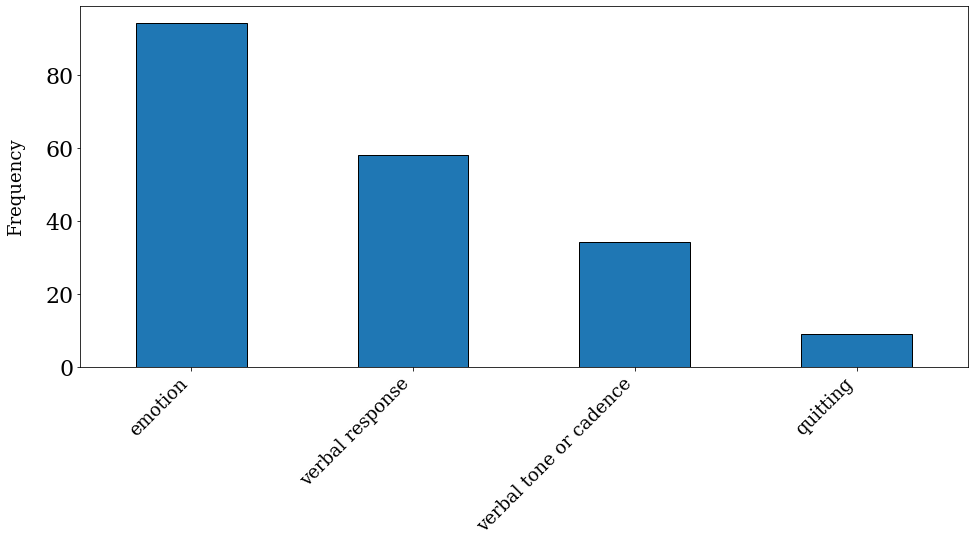

In [16]:

data = data[data['error'].isin([1, 2, 3])]

annotation_list = [
    "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
    "slower", "demanding tone", "interrogative tone", "filler words", "humor",
    "amusement", "confusion", "frustration",
    "quitting"
]

categories = {
    "verbal response": ["repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt"],
    "verbal tone or cadence": ["slower", "demanding tone", "interrogative tone", "filler words"],
    "emotion": ["amusement", "confusion", "frustration", "humor"],
    "quitting": ["quitting"]
}

data['labels'] = data['labels'].fillna("").astype(str)
data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label.strip() for label in x if label.strip() in annotation_list])

def assign_category(label):
    for category, labels in categories.items():
        if label in labels:
            return category
    return 'Uncategorized'

data = data.explode('labels')

data['category'] = data['labels'].apply(assign_category)

category_counts = data['category'].value_counts()

plt.figure(figsize=(14, 8), facecolor='white')
category_counts.sort_values(ascending=False).plot(kind='bar', edgecolor='black')
plt.ylabel("Frequency", labelpad=20, fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})
plt.savefig('category_frequencies.png', format='png', dpi=500)
print("Plot saved.")
plt.show()


In [5]:
data = data[data['error'].isin([1, 2, 3])]

data['labels'] = data['labels'].fillna("").astype(str)

data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label for label in x if label in annotation_list])

data = data.explode('labels')

grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)

grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)

Plot saved.


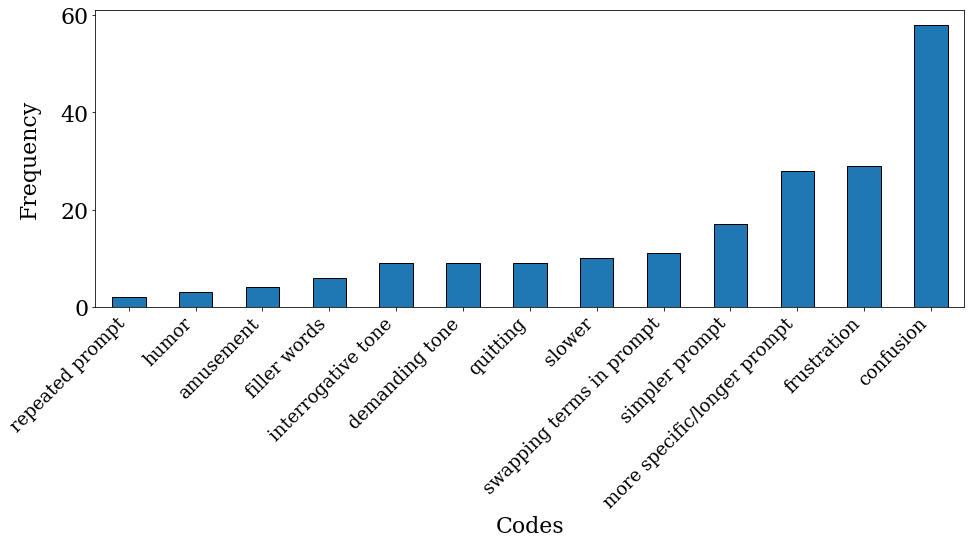

In [13]:
annotation_list = [
     "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
     "slower", "demanding tone", "interrogative tone", "filler words", "humor",
     "amusement", "confusion", "frustration",
     "quitting"
]

data['labels'] = data['labels'].fillna("").astype(str)

data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label for label in x if label in annotation_list])

data = data.explode('labels')

frequency = data['labels'].value_counts()
plt.figure(figsize=(14, 8), facecolor='white')

frequency.sort_values(ascending=True).plot(kind='bar', edgecolor='black')
plt.xlabel("Codes")
plt.ylabel("Frequency", labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})
plt.savefig('category_frequencies.png', format='png', dpi=500)
print("Plot saved.")
plt.show()


In [7]:
errors = grouped_data.index
annotations = grouped_data.columns
num_annotations = len(annotations)
bar_width = 0.8 / num_annotations
x_positions = np.arange(len(errors))

Plot saved.


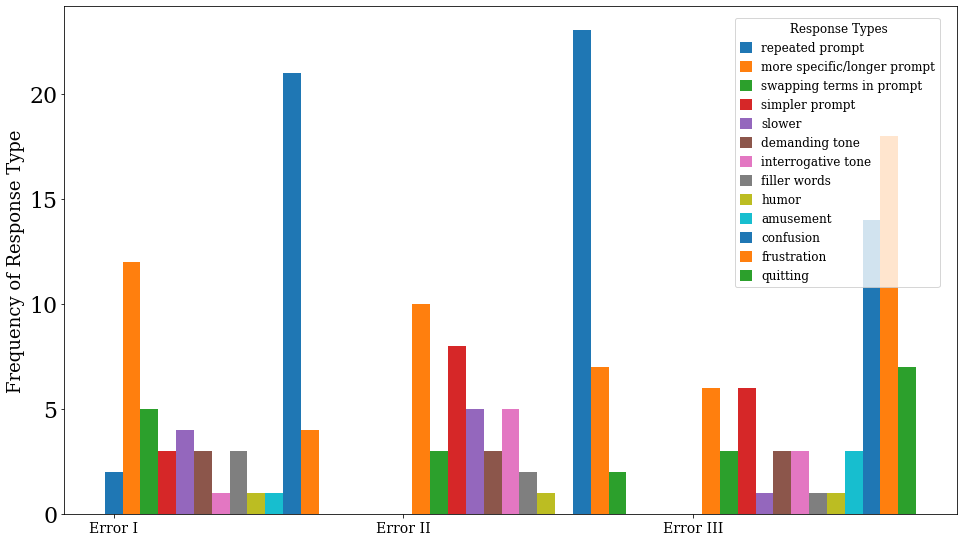

In [9]:
annotation_list = [
     "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
    #  "slower", "demanding tone", "interrogative tone", "filler words", "humor",
    #  "amusement", "confusion", "frustration",
    #  "quitting"
]

plt.figure(figsize=(14, 8), facecolor='white')

for i, annotation in enumerate(annotations):
    plt.bar(
        x_positions + i * bar_width, 
        grouped_data[annotation], 
        width=bar_width, 
        label=annotation, 
    )
x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(x_positions, x_labels, fontsize=14)

plt.ylabel(f"Frequency of Response Type", fontsize=18)
plt.legend(title=f" Response Types", title_fontsize=12, bbox_to_anchor=(0.75, 0.98), loc='upper left', fontsize=12, handleheight=1, handlelength=1, borderaxespad=0.1)
plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.savefig(f'_annotations_histogram.png', format='png', dpi=500)
print("Plot saved.")

plt.show()

In [ ]:
annotation_list = [
    "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
     "slower", "demanding tone", "interrogative tone", "filler words",
     "amusement", "confusion", "frustration", "humor"
      "quitting",
]

verbal_response = ["repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt"]

verbal_tone_cadence = ["slower", "demanding tone", "interrogative tone", "filler words"]

emotion = ["amusement", "confusion", "frustration", "humor"]

quitting = ["quitting"]

Plot saved.


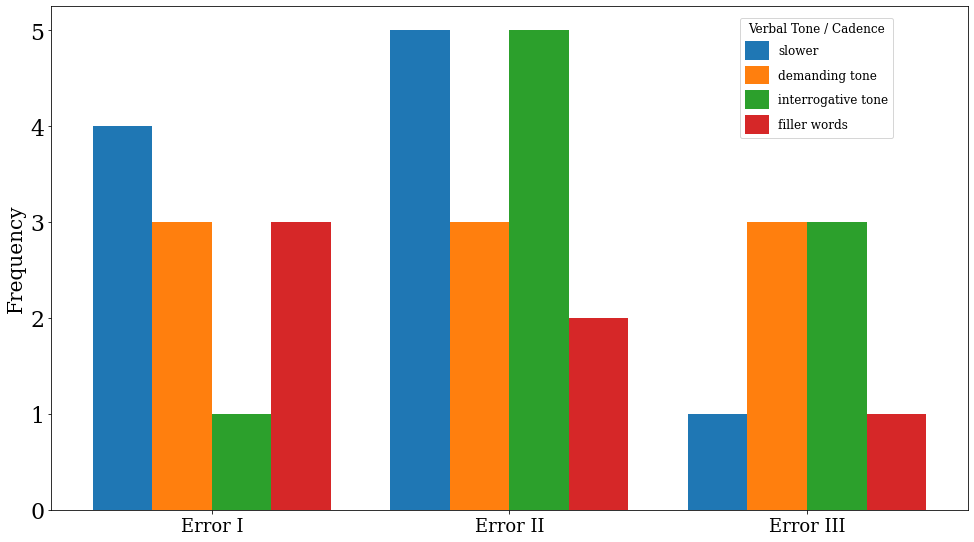

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

annotation_list = [
    #"repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
    "slower", "demanding tone", "interrogative tone", "filler words",
    # "amusement", "confusion", "frustration", "humor"
    #  "quitting",
]

annotation_name = "Verbal Tone / Cadence"

data = pd.read_csv('sorted_nodbot_annotations_revised.csv')

data['labels'] = data['labels'].fillna("").astype(str)

data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label for label in x if label in annotation_list])
# data['labels'] = data['labels'].str.split(", ").apply(
#     lambda x: ["amusement / humor" if label in ["amusement", "humor"] else label for label in x if label in annotation_list]
# )

data = data.explode('labels')

grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)
#annotation_list_combined = ["amusement / humor", "confusion", "frustration"]

grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)

errors = grouped_data.index
annotations = grouped_data.columns
num_annotations = len(annotations)
bar_width = 0.8 / num_annotations
x_positions = np.arange(len(errors))

plt.figure(figsize=(14, 8), facecolor='white')

for i, annotation in enumerate(annotations):
    plt.bar(
        x_positions + i * bar_width - bar_width * (num_annotations - 1) / 2, 
        grouped_data[annotation], 
        width=bar_width, 
        label=annotation, 
    )


x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(x_positions, x_labels, fontsize=18)

plt.ylabel(f"Frequency", fontsize=20)
plt.legend(title=annotation_name, title_fontsize=12, bbox_to_anchor=(0.75, 0.98), loc='upper left', fontsize=12, handleheight=2, handlelength=2, borderaxespad=0.1)

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

#plt.savefig(f'plots/tone_cadence_annotations_histogram.png', format='png', dpi=500)

print("Plot saved.")




Plot saved.


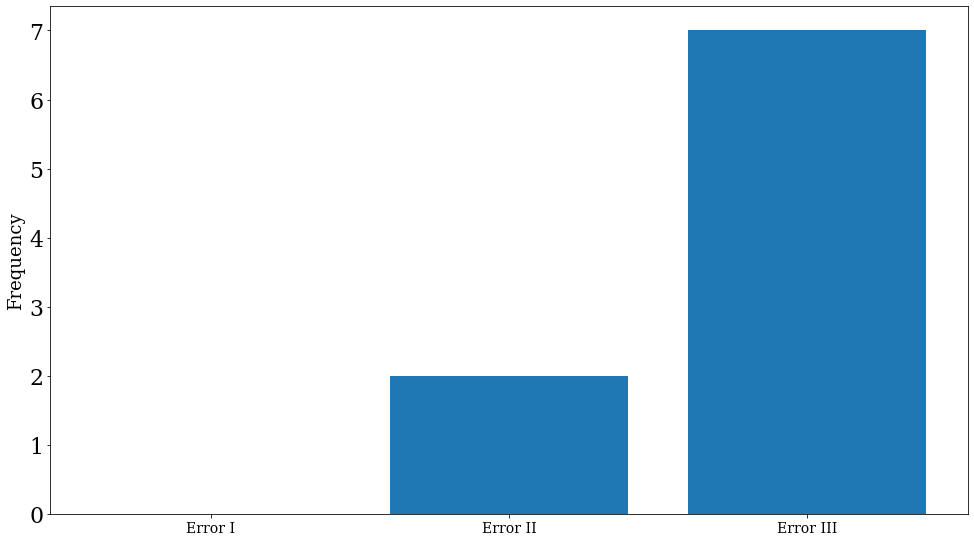

In [19]:
annotation_list = ["quitting"]

annotation_name = "Quitting"

data = pd.read_csv('sorted_nodbot_annotations_revised.csv')

data['labels'] = data['labels'].fillna("").astype(str)
data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label for label in x if label in annotation_list])
data = data.explode('labels')
grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)
grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)
grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)

errors = grouped_data.index
annotations = grouped_data.columns

bar_width = 0.8
x_positions = np.arange(len(errors))

plt.figure(figsize=(14, 8), facecolor='white')

for i, annotation in enumerate(annotations):
    plt.bar(
        x_positions + i * bar_width,
        grouped_data[annotation],
        width=bar_width, 
        label=annotation, 
    )

x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(x_positions, x_labels, fontsize=14)

plt.ylabel(f"Frequency", fontsize=18)

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.savefig(f'plots/quitting_annotations_histogram.png', format='png', dpi=500)
print("Plot saved.")

plt.show()


<Figure size 1008x576 with 0 Axes>

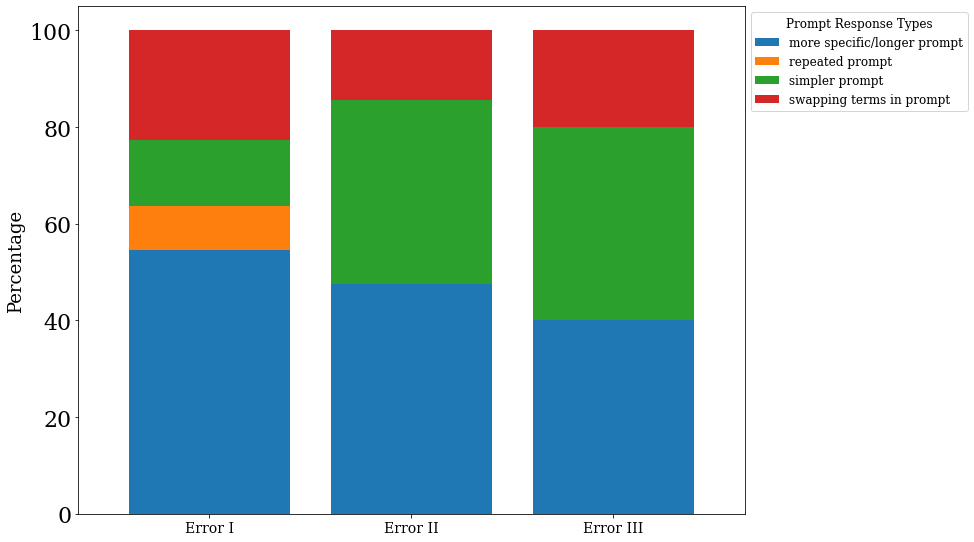

In [24]:
annotation_list = [
    "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt"
]

annotation_name = "Prompt Response Types"

data = pd.read_csv('sorted_nodbot_annotations_revised.csv')

data['labels'] = data['labels'].fillna("").astype(str)
data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label for label in x if label in annotation_list])

data = data.explode('labels')

grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)

grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)

errors = grouped_data.index
annotations = grouped_data.columns
plt.figure(figsize=(14, 8), facecolor='white')

grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
ax.set_facecolor('white')

x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(np.arange(len(errors)), x_labels, fontsize=14, rotation=0)

plt.xlabel(f"", fontsize=18)
plt.ylabel(f"Percentage", fontsize=18)

plt.legend(title=annotation_name, title_fontsize=12, loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.savefig(f'plots/percentage_prompt_annotations.png', format='png', dpi=500, facecolor="white")

plt.show()


<Figure size 1008x576 with 0 Axes>

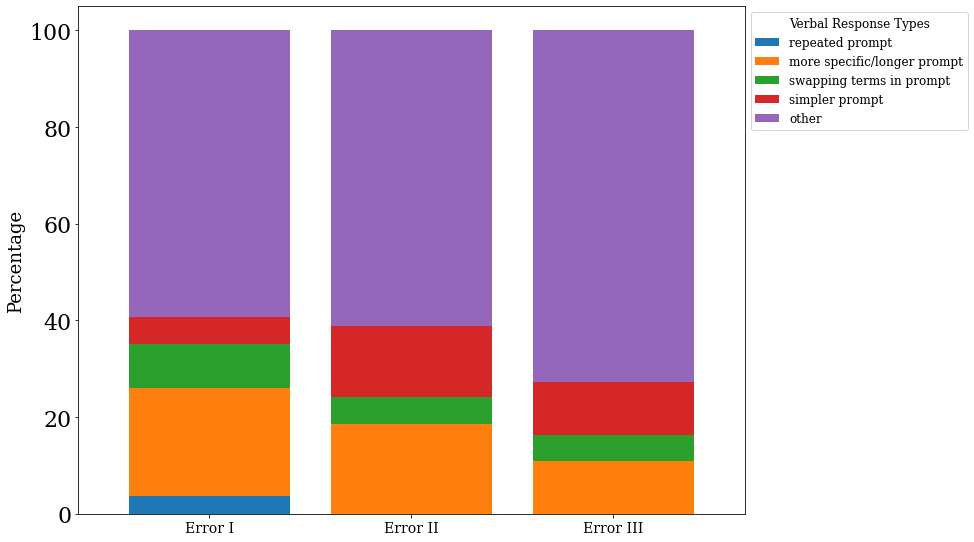

In [25]:
annotation_list = [
    "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt"
]
annotation_name = "Verbal Response Types"

data['labels'] = data['labels'].fillna("").astype(str)
data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label if label in annotation_list else "other" for label in x])

data = data.explode('labels')

grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)

grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)

columns_order = ["repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt", "other"]
grouped_data = grouped_data.reindex(columns=columns_order)

grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8), facecolor='white')
ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
ax.set_facecolor('white')

x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(np.arange(len(grouped_data.index)), x_labels, fontsize=14, rotation=0)

plt.xlabel(f"", fontsize=18)
plt.ylabel(f"Percentage", fontsize=18)

plt.legend(
    title=annotation_name,
    title_fontsize=12,
    labels=columns_order,
    loc='upper left',
    fontsize=12,
    bbox_to_anchor=(1, 1)
)

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.savefig(f'percentage_response_annotations.png', format='png', dpi=500, facecolor="white")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("speaker_diarization_all_audio.csv")

results = []

for participant in df['participant_num'].unique():
    participant_data = df[df['participant_num'] == participant]
    
    post_errors = []
    
    prev_row = None
    
    for index, row in participant_data.iterrows():
        if prev_row is not None and prev_row['speaker'] == 'nodbot' and row['speaker'] == 'participant':
            time_diff = row['start'] - prev_row['end']
            post_errors.append(time_diff)
        
        prev_row = row
    
    results.append({
        'participant_num': participant,
        'post_errors': post_errors
    })

post_error_df = pd.DataFrame(results)

post_error_df.to_csv("post_errors.csv", index=False)

print(post_error_df)

post_error_expanded = post_error_df['post_errors'].apply(pd.Series)

post_error_expanded.columns = [f'post_error_{i+1}' for i in range(post_error_expanded.shape[1])]

post_error_df_expanded = pd.concat([post_error_df['participant_num'], post_error_expanded], axis=1)

post_error_expanded = post_error_expanded[['post_error_1', 'post_error_2', 'post_error_3']]

average_post_errors = post_error_expanded.mean()

plt.figure(figsize=(14, 8), facecolor='white')
average_post_errors.plot(kind='bar')
plt.xticks(ticks=[0, 1, 2], labels=["Error I", "Error II", "Error III"], rotation=0)

plt.ylabel('Average Response Time (seconds)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.savefig('timings.png', format='png', dpi=500)
print("Plot saved.")

plt.show()

Error Times: [13.396, 22.424, 19.252, 24.652, 30.727, 13.953, 19.741, 26.592, 12.434, 19.977, 34.928, 13.278, 21.58, 26.626, 13.767, 18.914, 37.173, 12.704, 18.02, 26.795, 12.552, 18.796, 25.31, 13.615, 18.526, 22.778, 12.839, 20.129, 26.997, 13.143, 19.572, 24.584, 36.447, 13.497, 23.572, 13.362, 21.749, 28.786, 74.838, 13.058, 19.538, 25.748, 31.604, 43.012, 12.755, 13.042, 19.69, 13.548, 18.863, 27.453, 13.733, 19.555, 27.537, 12.991, 19.336, 28.55, 18.931, 24.82, 12.907, 18.155, 23.318, 13.16, 23.099, 28.567, 13.936, 18.307, 24.112, 13.261, 17.547, 22.508, 19.387]
Error 1:      Unnamed: 0  video_id  annotation_id  participant_num      start  \
5             7         1              1                2  17.259485   
6             3         1              1                2  19.926060   
7             4         1              1                2  20.482818   
13           20         3              3                4  13.777292   
14           13         3              3                

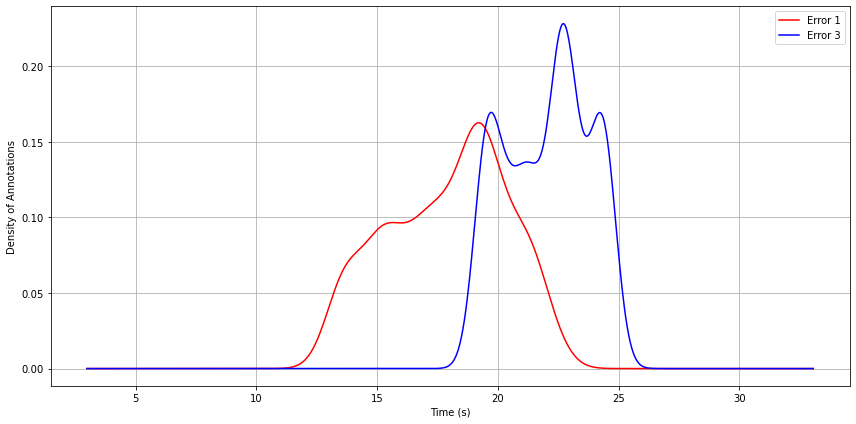

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

annotations_file = "sorted_nodbot_annotations_revised.csv"
annotations_df = pd.read_csv(annotations_file)

timing_file = "speaker_diarization_all_audio.csv"
timing_df = pd.read_csv(timing_file)

timing_df["transition"] = (
    (timing_df["speaker"] == "participant") &
    (timing_df["speaker"].shift() == "nodbot") &
    (timing_df["participant_num"] == timing_df["participant_num"].shift())
).cumsum()

error_transitions = timing_df[timing_df["transition"] > 0].groupby("transition").head(1)

error_times = error_transitions["start"].unique().tolist()

while len(error_times) < 3:
    error_times.append(float('inf'))

print("Error Times:", error_times)

plt.figure(figsize=(12, 6))
colors = ['r', 'g', 'b']

for i in range(3):
    start_time = error_times[i]
    end_time = min(error_times[i + 1], annotations_df["start"].max())

    annotations = annotations_df[
        (annotations_df["start"] >= start_time) & (annotations_df["start"] < end_time)
    ].copy()

    print(f"Error {i + 1}: {annotations}")

    annotation_times = annotations["start"]

    if len(annotation_times) > 1: 
        kde = gaussian_kde(annotation_times, bw_method=0.3)
        x_vals = np.linspace(annotations_df["start"].min(), annotations_df["start"].max(), 1000)
        y_vals = kde(x_vals)

        plt.plot(
            x_vals,
            y_vals,
            label=f"Error {i + 1}",
            color=colors[i]
        )
    else:
        print(f"Warning: Error {i + 1} has insufficient annotations for KDE.")

plt.xlabel("Time (s)")
plt.ylabel("Density of Annotations")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
